# FORNAX 2D Neutrino Spectra

Neutrino spectra from the 2D long-duraction models produced for 100 progenitors (1/3 form black holes).

Data take from the [Princeton group webpage](https://www.astro.princeton.edu/~burrows/nu-emissions.2d.large/) and converted to HDF5 format for use in SNEWPY.

In [1]:
from snewpy.neutrino import Flavor
from snewpy.models.ccsn import Fornax_2022

from astropy import units as u
from glob import glob

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mpl.rc('font', size=16)

## Initialize Models

To start, see what progenitors are avaialble for the `Fornax_2022` model. Use the `param` property to view all physics parameters and their possible values.

In [3]:
Fornax_2022.param

{'progenitor': ['9.0',
  '9.25',
  '9.5',
  '9.75',
  '10.0',
  '10.25',
  '10.5',
  '10.75',
  '11.0',
  '11.25',
  '11.5',
  '11.75',
  '12.00.bh',
  '12.03.bh',
  '12.07.bh',
  '12.1.bh',
  '12.13',
  '12.15',
  '12.18.bh',
  '12.20.bh',
  '12.25',
  '12.33.bh',
  '12.40.bh',
  '12.45.bh',
  '12.50.bh',
  '12.54.bh',
  '12.60.bh',
  '12.63',
  '12.70',
  '12.72.bh',
  '12.75',
  '12.80.bh',
  '12.85.bh',
  '12.90.bh',
  '12.93',
  '12.97.bh',
  '13.00.bh',
  '13.05.bh',
  '13.11',
  '13.25.bh',
  '13.27.bh',
  '13.32.bh',
  '13.40.bh',
  '13.45',
  '13.50.bh',
  '13.60.bh',
  '13.75',
  '13.82.bh',
  '13.90.bh',
  '13.96',
  '14.01',
  '14.13.bh',
  '14.25.bh',
  '14.40.bh',
  '14.41.bh',
  '14.43',
  '14.44.bh',
  '14.70.bh',
  '14.87.bh',
  '15.00.bh',
  '15.01',
  '15.04.bh',
  '15.05',
  '15.38.bh',
  '16.43',
  '16.65',
  '16.99',
  '17.00',
  '17.07',
  '17.10',
  '17.40',
  '17.48',
  '17.50',
  '17.51',
  '17.83',
  '18.04',
  '18.05',
  '18.09',
  '18.10',
  '18.50',
  '19.

Initialize some progenitors and plot the luminosity of different neutrino flavors for two of them. Note that the `Fornax_2022` set of models do not distinguish between $\nu_x$ and $\bar{\nu}_x$ so both have the same luminosity. If this is the first time you are using a progenitor model, `snewpy` will download the data files for you.

In [4]:
models = {}
for m in Fornax_2022.param['progenitor'][::20]:
    # Initialize every 20th progenitor.
    print(m)
    filename = f'/Users/sybenzvi/Documents/IceCube/SNEWS/snewpy-models-ccsn/models/Fornax_2022/lum_spec_{m}_dat.h5'
    models[m] = Fornax_2022(filename)
    
models

9.0
12.25
13.27.bh
15.01
19.02


/var/folders/36/1b79mjl17pb7985ht92v_9940000gn/T/ipykernel_97158/1514269454.py:6: FutureWarning: Initializing this model with a filename is deprecated. Instead, use keyword arguments ['progenitor', 'progenitor_mass']. See `Fornax_2022.param`, `Fornax_2022.get_param_combinations()` for more info.
  models[m] = Fornax_2022(filename)


{'9.0': Fornax_2022 Model
 Progenitor       : 9.0
 Progenitor mass  : 9.0 solMass,
 '12.25': Fornax_2022 Model
 Progenitor       : 12.25
 Progenitor mass  : 12.25 solMass,
 '13.27.bh': Fornax_2022 Model
 Progenitor       : 13.27.bh
 Progenitor mass  : 13.27 solMass,
 '15.01': Fornax_2022 Model
 Progenitor       : 15.01
 Progenitor mass  : 15.01 solMass,
 '19.02': Fornax_2022 Model
 Progenitor       : 19.02
 Progenitor mass  : 19.02 solMass}

In [5]:
# models[0] = Fornax_2022('/Users/sybenzvi/Documents/IceCube/SNEWS/snewpy-models-ccsn/models/Fornax_2022/lum_spec_9.0_dat.h5')
# models[1] = Fornax_2022('/Users/sybenzvi/Documents/IceCube/SNEWS/snewpy-models-ccsn/models/Fornax_2022/lum_spec_14.70.bh_dat.h5')

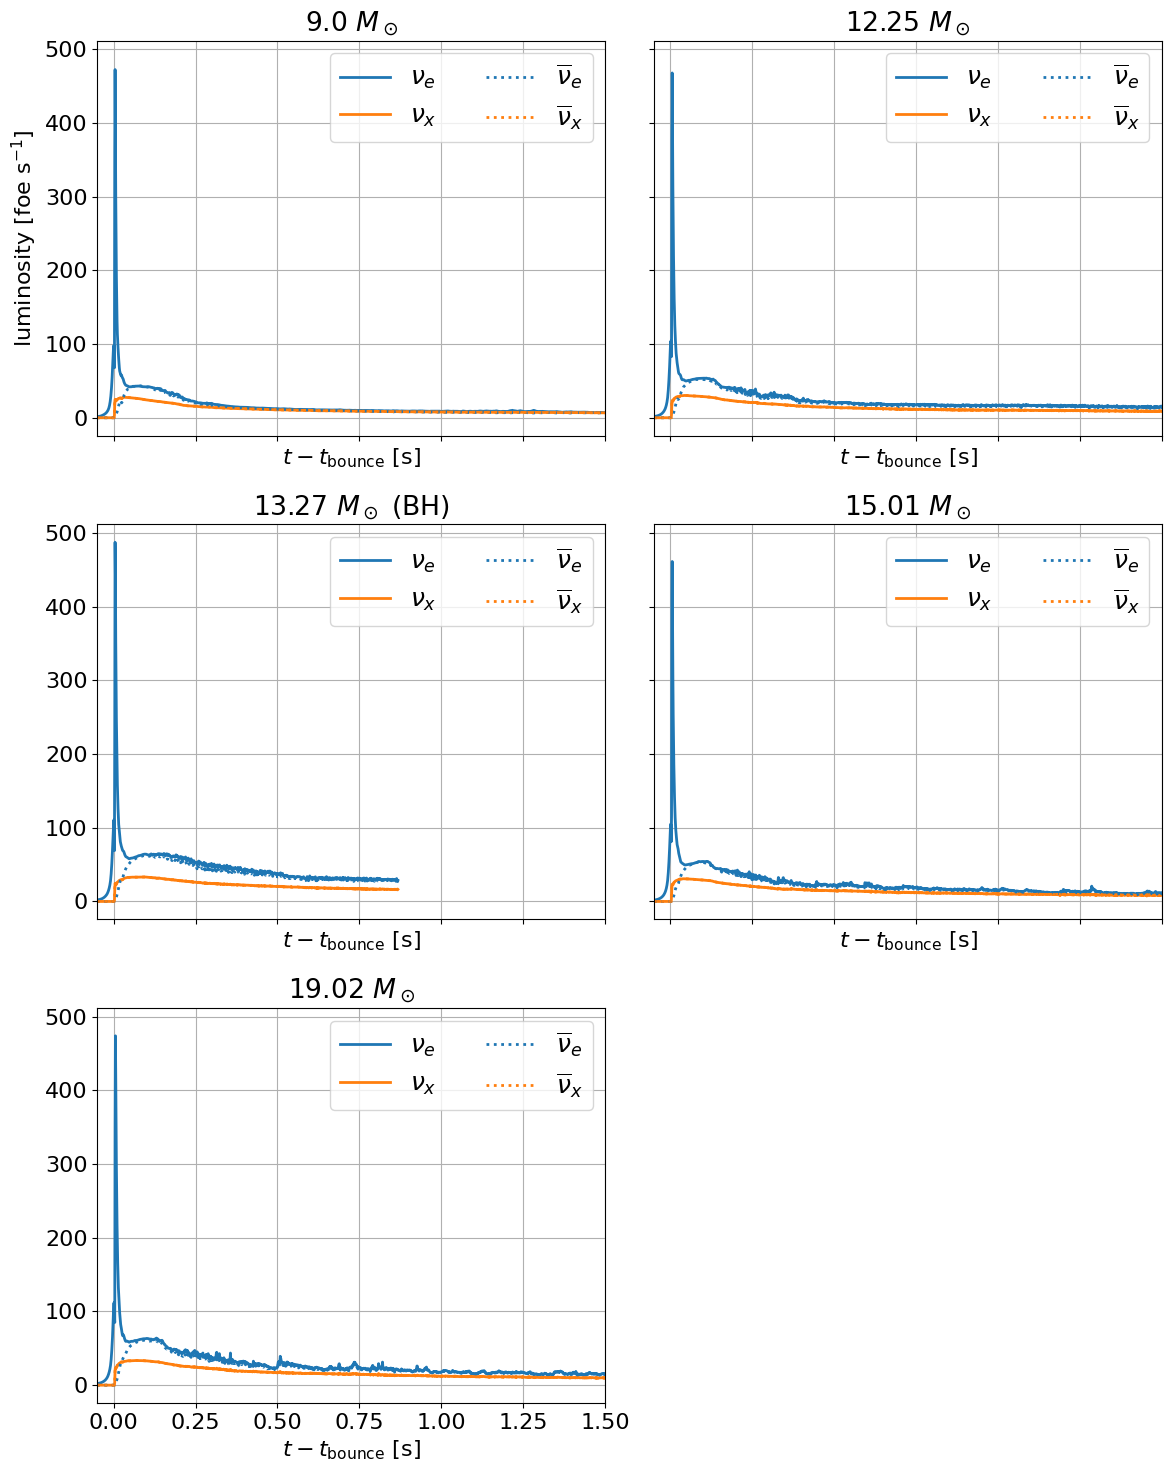

In [6]:
fig, axes = plt.subplots(3, 2, figsize=(12, 15), sharex=True, sharey=True, tight_layout=True)
axes = axes.flatten()

for i, (key, model) in enumerate(models.items()):
    if i >= 5:
        break
    ax = axes[i]
    for flavor in Flavor:
        ax.plot(model.time, model.luminosity[flavor]/1e51,  # Report luminosity in units foe/s
                label=flavor.to_tex(),
                color='C0' if flavor.is_electron else 'C1',
                ls='-' if flavor.is_neutrino else ':',
                lw=2)
        
    modtitle = '{} $M_\odot$'.format(model.metadata['Progenitor mass'].value)
    if 'bh' in model.metadata['Progenitor']:
        modtitle += ' (BH)'
        
    ax.set(xlim=(-0.05, 1.5),
           xlabel=r'$t-t_{\rm bounce}$ [s]',
           title=modtitle)
    ax.grid()
    ax.legend(loc='upper right', ncol=2, fontsize=18)

axes[0].set(ylabel=r'luminosity [foe s$^{-1}$]');
axes[5].set_axis_off();

## Spectra of All Flavors vs. Time for the 19.02 $M_\odot$ Model

### Use Default Linear Interpolation in Flux Retrieval

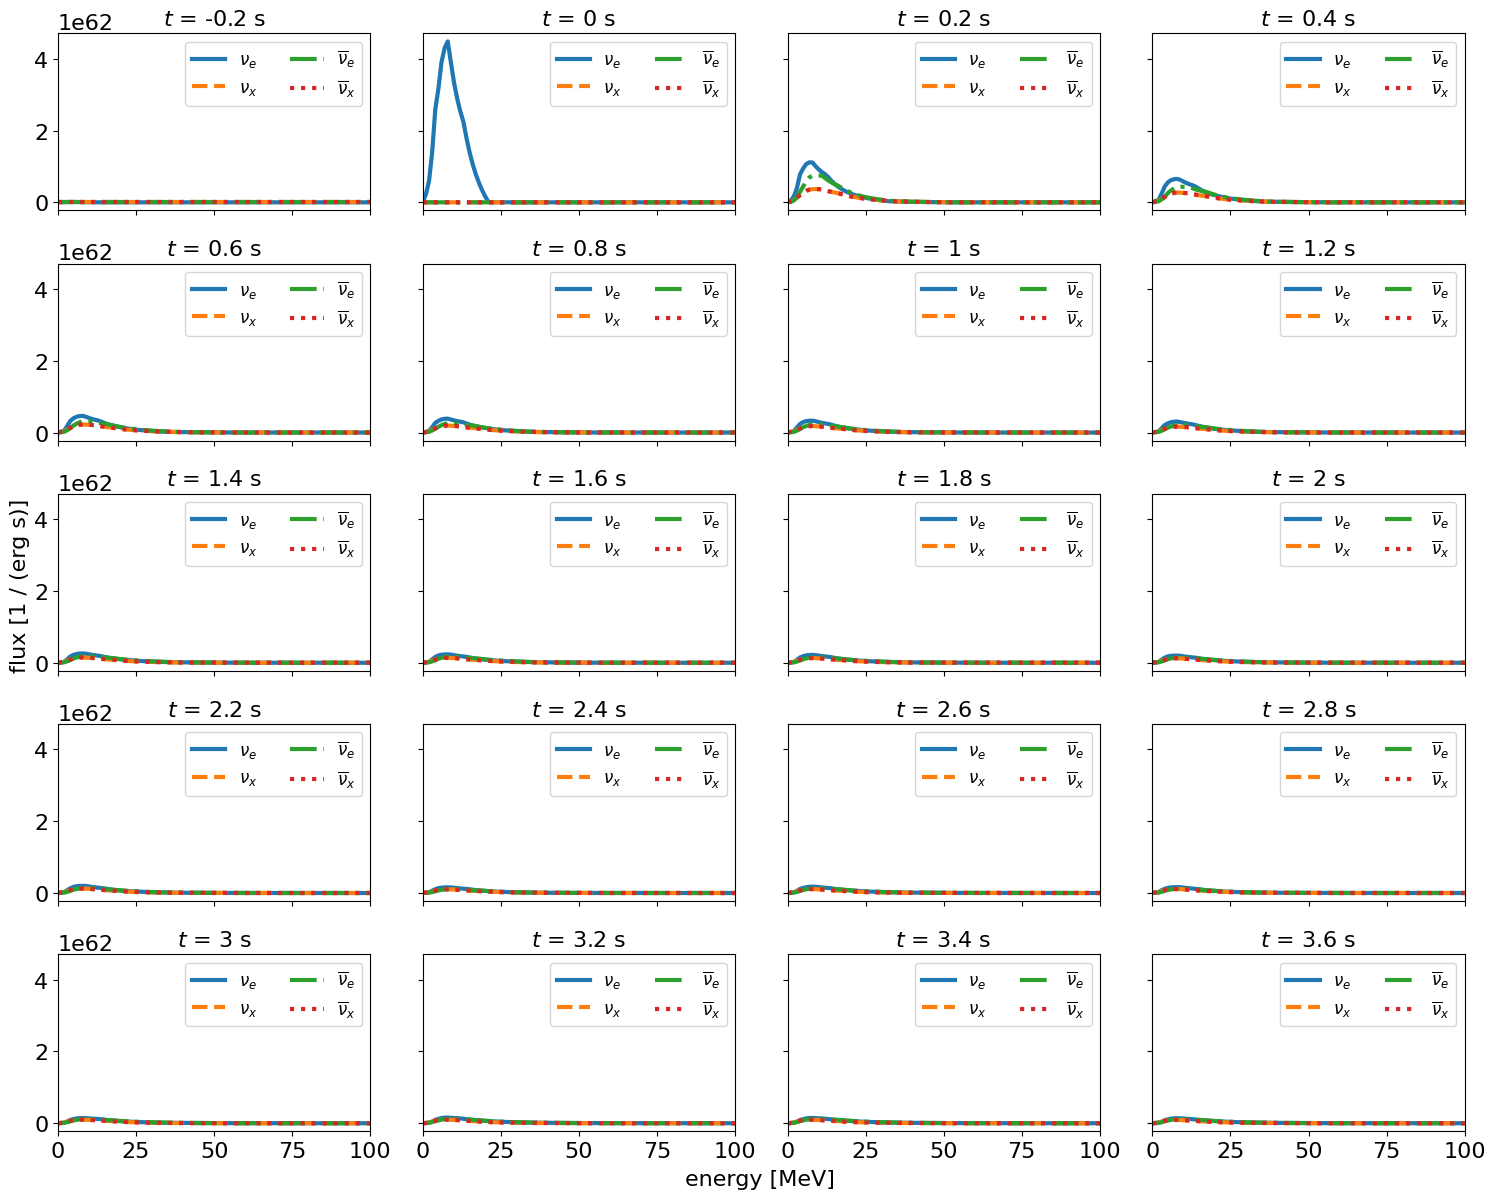

In [7]:
model = models['19.02']  # Use the 12 solar mass model

times = np.arange(-0.2, 3.8, 0.2) * u.s
E = np.arange(0, 101, 1) * u.MeV

fig, axes = plt.subplots(5,4, figsize=(15,12), sharex=True, sharey=True, tight_layout=True)

linestyles = ['-', '--', '-.', ':']

for t, ax in zip(times, axes.flatten()):
    spectra = model.get_initial_spectra(t, E)
    for line, flavor in zip(linestyles, Flavor):
        ax.plot(E, spectra[flavor], lw=3, ls=line, label=flavor.to_tex())
    ax.set(xlim=(0,100))
    ax.set_title('$t$ = {:g}'.format(t), fontsize=16)
    ax.legend(loc='upper right', ncol=2, fontsize=12)

fig.text(0.5, 0., 'energy [MeV]', ha='center')
fig.text(0., 0.5, f'flux [{spectra[Flavor.NU_E].unit}]', va='center', rotation='vertical');

### Use Nearest-Bin "Interpolation" in Flux Retrieval

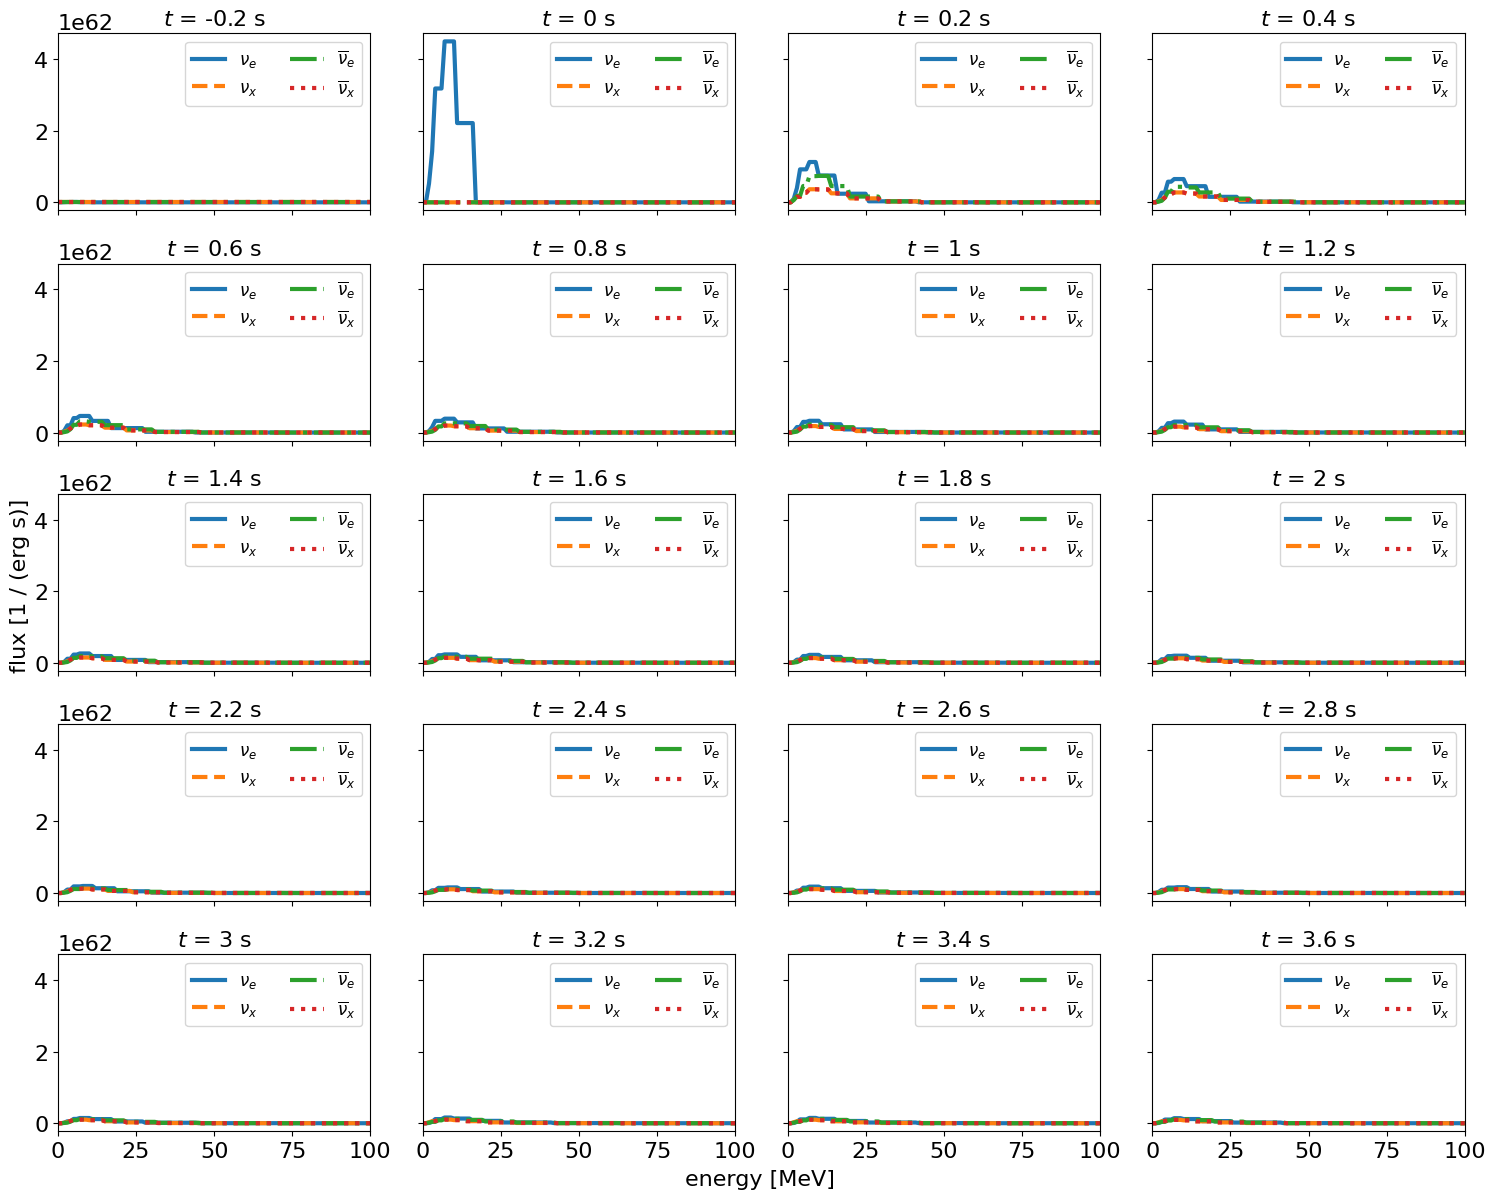

In [8]:
times = np.arange(-0.2, 3.8, 0.2) * u.s
E = np.arange(0, 101, 1) * u.MeV

fig, axes = plt.subplots(5,4, figsize=(15,12), sharex=True, sharey=True, tight_layout=True)

linestyles = ['-', '--', '-.', ':']

for t, ax in zip(times, axes.flatten()):
    spectra = model.get_initial_spectra(t, E, interpolation='nearest')
    for line, flavor in zip(linestyles, Flavor):
        ax.plot(E, spectra[flavor], lw=3, ls=line, label=flavor.to_tex())
    ax.set(xlim=(0,100))
    ax.set_title('$t$ = {:g}'.format(t), fontsize=16)
    ax.legend(loc='upper right', ncol=2, fontsize=12)

fig.text(0.5, 0., 'energy [MeV]', ha='center')
fig.text(0., 0.5, f'flux [{spectra[Flavor.NU_E].unit}]', va='center', rotation='vertical');

## Progenitor Mass Dependence

### Luminosity vs. Time for a Selected List of Progenitor Masses

Plot $L_{\nu_e}(t)$ for a selection of progenitor masses to observe the dependence of the emission on mass.

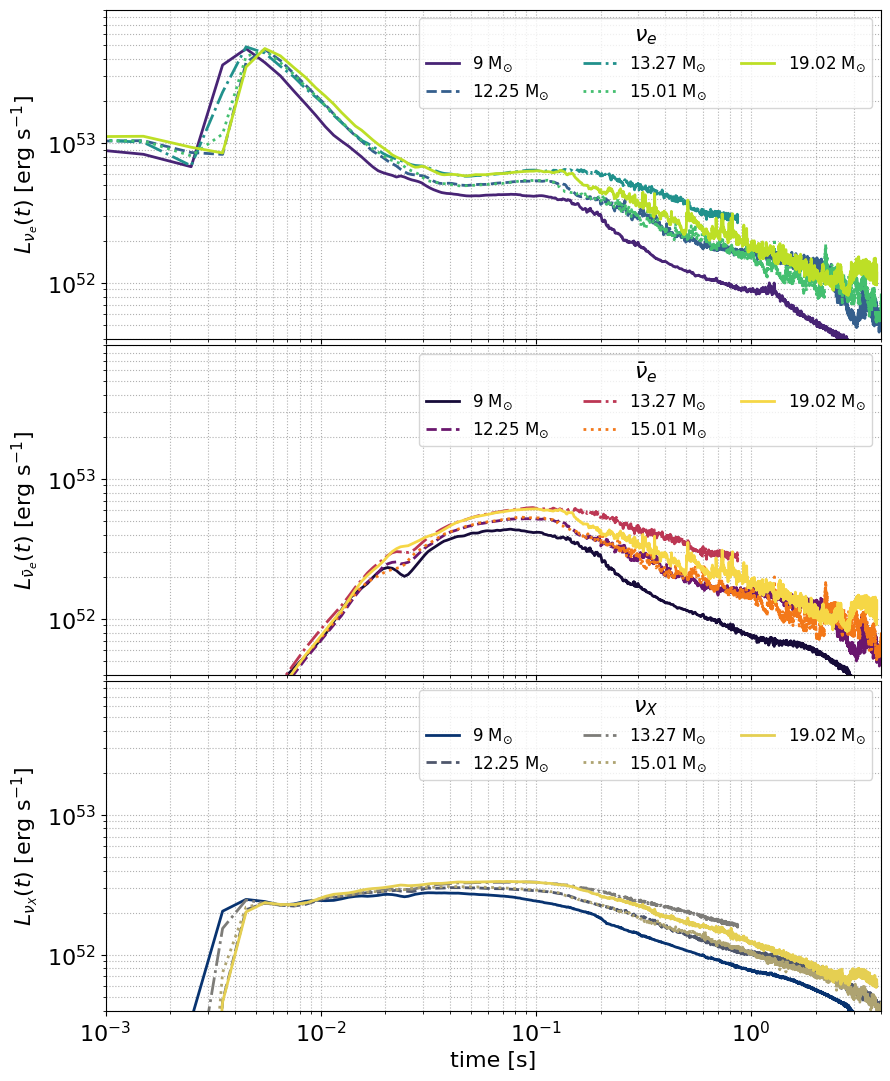

In [9]:
fig, axes = plt.subplots(3,1, figsize=(10,13), sharex=True, sharey=True,
                         gridspec_kw = {'hspace':0.02})

colors0 = mpl.cm.viridis(np.linspace(0.1,0.9, len(models)))
colors1 = mpl.cm.inferno(np.linspace(0.1,0.9, len(models)))
colors2 = mpl.cm.cividis(np.linspace(0.1,0.9, len(models)))

linestyles = ['-', '--', '-.', ':']

for i, model in enumerate(models.values()):
    ax = axes[0]
    flavor = Flavor.NU_E
    ax.plot(model.time, model.luminosity[flavor], lw=2, color=colors0[i], ls=linestyles[i%4],
            label='${0.value:g}$ {0.unit:latex}'.format(model.progenitor_mass))
    ax.set(xscale='log',
           xlim=(1e-3, 4),
           yscale='log',
           ylim=(0.4e52, 9e53),
           ylabel=r'$L_{\nu_e}(t)$ [erg s$^{-1}$]')
    ax.grid(ls=':', which='both')
    ax.legend(ncol=3, fontsize=12, title=r'$\nu_e$');
    
    ax = axes[1]
    flavor = Flavor.NU_E_BAR
    ax.plot(model.time, model.luminosity[flavor], lw=2, color=colors1[i], ls=linestyles[i%4],
        label='${0.value:g}$ {0.unit:latex}'.format(model.progenitor_mass))
    ax.set(ylabel=r'$L_{\bar{\nu}_e}(t)$ [erg s$^{-1}$]')
    ax.grid(ls=':', which='both')
    ax.legend(ncol=3, fontsize=12, title=r'$\bar{\nu}_e$');
    
    ax = axes[2]
    flavor = Flavor.NU_X
    ax.plot(model.time, model.luminosity[flavor], lw=2, color=colors2[i], ls=linestyles[i%4],
        label='${0.value:g}$ {0.unit:latex}'.format(model.progenitor_mass))
    ax.set(xlabel='time [s]',
           ylabel=r'$L_{\nu_X}(t)$ [erg s$^{-1}$]')
    ax.grid(ls=':', which='both')
    ax.legend(ncol=3, fontsize=12, title=r'$\nu_X$');

## Progenitor Dependence of Spectra at 70 ms

### Use Default Linear Interpolation in Flux Retrieval

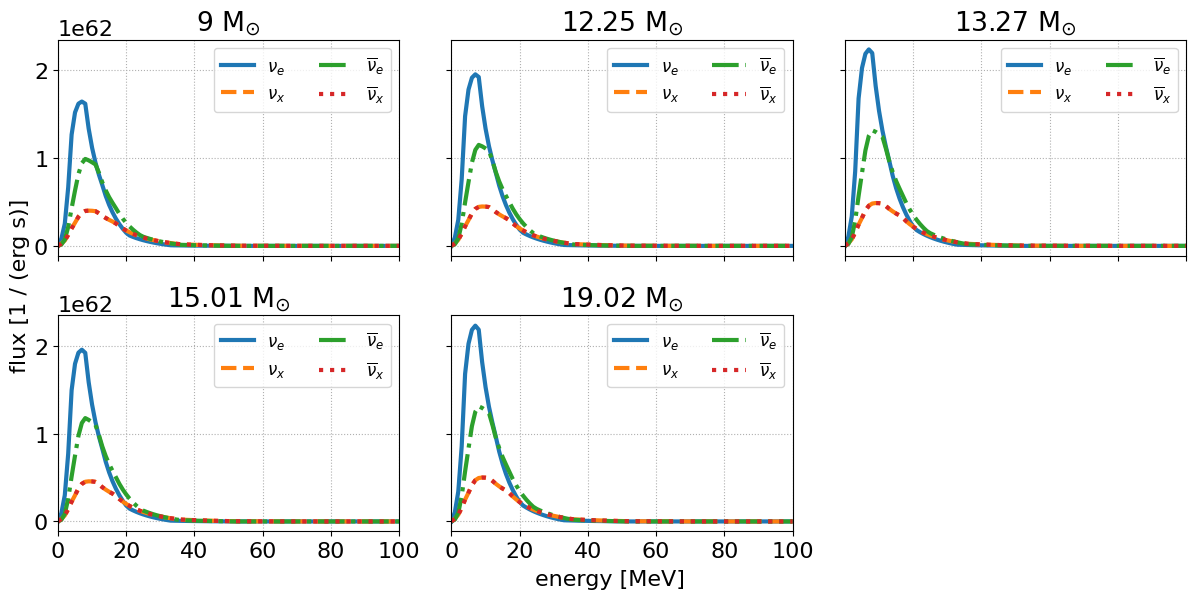

In [10]:
t = 70*u.ms
E = np.arange(0, 101, 1) * u.MeV

fig, axes = plt.subplots(2,3, figsize=(12,6), sharex=True, sharey=True, tight_layout=True)

linestyles = ['-', '--', '-.', ':']

for model, ax in zip(models.values(), axes.flatten()):
    spectra = model.get_initial_spectra(t, E)
    for line, flavor in zip(linestyles, Flavor):
        ax.plot(E, spectra[flavor], lw=3, ls=line, label=flavor.to_tex())
    ax.set(xlim=(0,100))
    ax.set_title('${0.value:g}$ {0.unit:latex}'.format(model.progenitor_mass))
    ax.legend(loc='upper right', ncol=2, fontsize=12)
    ax.grid(ls=':')

axes.flatten()[-1].set_axis_off()

fig.text(0.5, 0., 'energy [MeV]', ha='center')
fig.text(0., 0.5, f'flux [{spectra[Flavor.NU_E].unit}]', va='center', rotation='vertical');

### Use Nearest-Bin "Interpolation" in Flux Retrieval

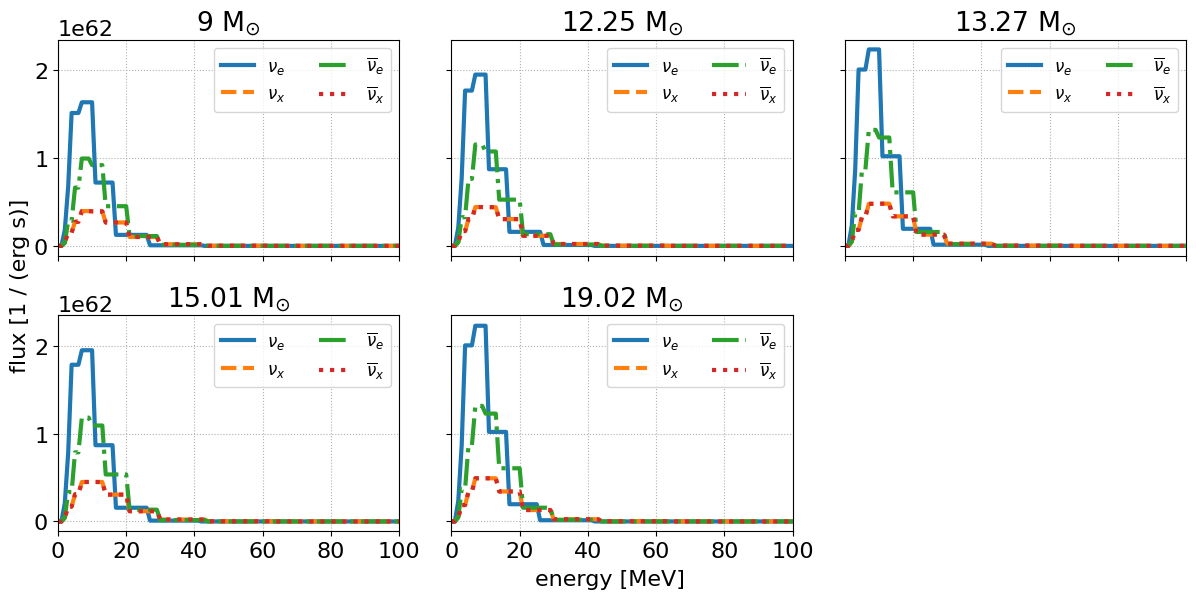

In [11]:
t = 70*u.ms
E = np.arange(0, 101, 1) * u.MeV

fig, axes = plt.subplots(2,3, figsize=(12,6), sharex=True, sharey=True, tight_layout=True)

linestyles = ['-', '--', '-.', ':']

for model, ax in zip(models.values(), axes.flatten()):
    spectra = model.get_initial_spectra(t, E, interpolation='nearest')
    for line, flavor in zip(linestyles, Flavor):
        ax.plot(E, spectra[flavor], lw=3, ls=line, label=flavor.to_tex())
    ax.set(xlim=(0,100))
    ax.set_title('${0.value:g}$ {0.unit:latex}'.format(model.progenitor_mass))
    ax.legend(loc='upper right', ncol=2, fontsize=12)
    ax.grid(ls=':')

axes.flatten()[-1].set_axis_off()

fig.text(0.5, 0., 'energy [MeV]', ha='center')
fig.text(0., 0.5, f'flux [{spectra[Flavor.NU_E].unit}]', va='center', rotation='vertical');